<a href="https://colab.research.google.com/github/Elizaveta0803/LabAnalitika/blob/main/%D0%9B%D0%B0%D0%B1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тестовый набор данных

In [1]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

seed(1)

data = 5 * randn(100) + 50

print('mean=%.3f stdv=%.3f' %(mean(data), std(data)))


mean=50.303 stdv=4.426


# Визуальные проверки нормальности

**График гистограммы**

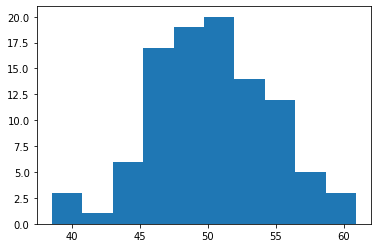

In [2]:
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot

seed(1)

data = 5 * randn(100) + 50

pyplot.hist(data)
pyplot.show()

**График Квантиль-Квантиль**

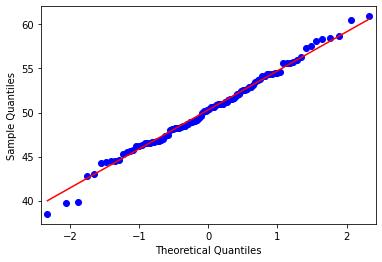

In [3]:
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

seed(1)

data = 5 * randn(100) + 50

qqplot(data, line='s')
pyplot.show()

# Статистические тесты нормальности

**Тест Шапиро-Вилка**

In [6]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

seed(1)

data = 5 * randn(100) + 50

stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


**Тест д'Агостино на K ^ 2**

In [7]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

seed(1)

data = 5 * randn(100) + 50

stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not look Gaussian (reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


**Тест Андерсона-Дарлинга**

In [9]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

seed(1)

data = 5 * randn(100) + 50

result = anderson(data)
print('Statistics: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
  else:
    print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistics: 0.220
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)


# *Индивидуальное задание*

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
url='https://en.wikipedia.org/wiki/List_of_highest-grossing_films_in_Germany'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]

In [2]:
df.head()

,Rank,Title,Film,Admissions[1]
0,1,The Jungle Book,1968,27290763
1,2,Titanic,1998,18812740
2,3,Once Upon a Time in the West,1969,13012746
3,4,Doctor Zhivago,1966,12750000
4,5,Harry Potter and the Philosopher's Stone,2001,12595323


In [3]:
df1 = df.rename(columns={'Film': 'Year', 'Admissions[1]': 'Admissions'})
df1.head()

,Rank,Title,Year,Admissions
0,1,The Jungle Book,1968,27290763
1,2,Titanic,1998,18812740
2,3,Once Upon a Time in the West,1969,13012746
3,4,Doctor Zhivago,1966,12750000
4,5,Harry Potter and the Philosopher's Stone,2001,12595323


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           30 non-null     int64 
 1   Title          30 non-null     object
 2   Film           30 non-null     int64 
 3   Admissions[1]  30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


In [5]:
df.isna().sum()

Rank             0
Title            0
Film             0
Admissions[1]    0
dtype: int64

In [6]:
df2 = df1[['Admissions','Year']].sort_values(ascending=False,by='Admissions')
df2.head()

,Admissions,Year
0,27290763,1968
1,18812740,1998
2,13012746,1969
3,12750000,1966
4,12595323,2001


In [7]:
n_admissions = df2['Admissions'].to_numpy()
n_year = df2['Year'].to_numpy()
n_admissions

array([27290763, 18812740, 13012746, 12750000, 12595323, 12267000,
       11930785, 11899893, 11721183, 11311518, 11294126, 11250000,
       11000000, 10753596, 10625337, 10442102, 10250000, 10000000,
       10000000,  9767049,  9728779,  9395450,  9272424,  9165932,
        9162715,  9060311,  9000000,  8962516,  8839084,  8823781])

In [23]:
n_year

array([1968, 1998, 1969, 1966, 2001, 1972, 2001, 1994, 2001, 2009, 1971,
       1965, 1964, 2002, 1990, 2003, 1965, 1962, 1963, 1977, 2002, 1993,
       1996, 2004, 2012, 2015, 1967, 1999, 2003, 1987])

# Визуальные проверки нормальности

**График гистограммы**

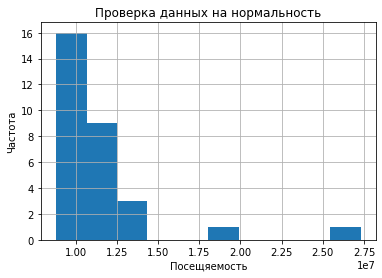

In [8]:
from matplotlib import pyplot
n_admissions_sort = np.sort(n_admissions)
fig, ax = plt.subplots()
ax.hist(n_admissions_sort)
ax.set_xlabel('Посещяемость')
ax.set_ylabel('Частота')
ax.set_title('Проверка данных на нормальность')
ax.grid(True)
pyplot.show()

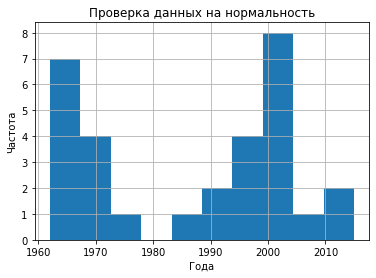

In [14]:
n_year_sort = np.sort(n_year)
fig, ax = plt.subplots()
ax.hist(n_year_sort)
ax.set_xlabel('Года')
ax.set_ylabel('Частота')
ax.set_title('Проверка данных на нормальность')
ax.grid(True)
pyplot.show()

**График Квантиль-Квантиль**

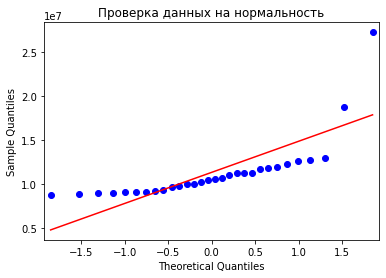

In [15]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(n_admissions_sort, line = 's')
pyplot.title('Проверка данных на нормальность')
pyplot.show()

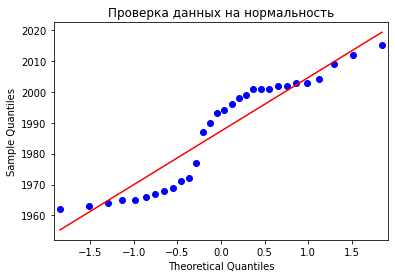

In [16]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(n_year_sort, line = 's')
pyplot.title('Проверка данных на нормальность')
pyplot.show()

# Статистические тесты нормальности

**Тест Шапиро-Вилка**

In [17]:
from scipy.stats import shapiro

stat, p = shapiro(n_admissions_sort)
print('Statistics=%.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject HO)')
else:
  print('Sample does not look Gaussian (reject HO)')

Statistics=0.599, p = 0.000
Sample does not look Gaussian (reject HO)


In [18]:
from scipy.stats import shapiro

stat, p = shapiro(n_year_sort)
print('Statistics=%.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject HO)')
else:
  print('Sample does not look Gaussian (reject HO)')

Statistics=0.877, p = 0.002
Sample does not look Gaussian (reject HO)


**Тест д'Агостино на K ^ 2**

In [19]:
from scipy.stats import normaltest


stat, p = normaltest(n_admissions_sort)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not look Gaussian (reject H0)')

Statistics=47.420, p=0.000
Sample does not look Gaussian (reject H0)


In [20]:
from scipy.stats import normaltest


stat, p = normaltest(n_year_sort)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not look Gaussian (reject H0)')

Statistics=18.660, p=0.000
Sample does not look Gaussian (reject H0)


**Тест Андерсона-Дарлинга**

In [21]:
from scipy.stats import anderson

result = anderson(n_admissions_sort)
print('Statistics: %.3f' % result.statistic)
p = 0

for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
  else:
    print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistics: 3.530
15.000: 0.521, data does not look normal (reject H0)
10.000: 0.593, data does not look normal (reject H0)
5.000: 0.712, data does not look normal (reject H0)
2.500: 0.830, data does not look normal (reject H0)
1.000: 0.988, data does not look normal (reject H0)


In [22]:
from scipy.stats import anderson

result = anderson(n_year_sort)
print('Statistics: %.3f' % result.statistic)
p = 0

for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[i], result.critical_values[i]
  if result.statistic < result.critical_values[i]:
    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
  else:
    print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistics: 1.538
15.000: 0.521, data does not look normal (reject H0)
10.000: 0.593, data does not look normal (reject H0)
5.000: 0.712, data does not look normal (reject H0)
2.500: 0.830, data does not look normal (reject H0)
1.000: 0.988, data does not look normal (reject H0)


**Вывод**

Тесты и графики показали, что данные по году и посещяемости не являются нормальными